# CNN example

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gpu = tf.config.list_physical_devices()[1]
tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
(ds_train, ds_val, ds_test) = tfds.load(
    'horses_or_humans',
    split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'],
    shuffle_files=True,
    as_supervised=True,
)

In [4]:
ds_train = ds_train.batch(32)
ds_val = ds_val.batch(32)
ds_test= ds_test.batch(32)

In [5]:
input_shape = (300, 300, 3)
inputs = Input(shape=input_shape)

x = layers.Conv2D(32, (3, 3), activation='relu')(inputs) # convolution and detector step
x = layers.MaxPooling2D((2, 2))(x) # pooling step


x = layers.Flatten()(x) # flattenting for classification
outputs = layers.Dense(2, activation='softmax')(x) # 2 classes

# Create the model
model = models.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
history = model.fit(ds_train, epochs=10, validation_data=(ds_val))

Epoch 1/10


c:\Users\mairi\code\dudads-chapters\.conda\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 [==============================] - 25s 130ms/step - loss: 3684.8276 - accuracy: 0.5702 - val_loss: 516.0768 - val_accuracy: 0.5130
Epoch 2/10
23/23 [==============================] - 2s 97ms/step - loss: 56.8790 - accuracy: 0.8498 - val_loss: 4.4211 - val_accuracy: 0.9805
Epoch 3/10
23/23 [==============================] - 2s 91ms/step - loss: 6.1405 - accuracy: 0.9555 - val_loss: 14.8835 - val_accuracy: 0.9221
Epoch 4/10
23/23 [==============================] - 2s 93ms/step - loss: 2.3442 - accuracy: 0.9889 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
23/23 [==============================] - 2s 95ms/step - loss: 0.1770 - accuracy: 0.9972 - val_loss: 1.3934e-08 - val_accuracy: 1.0000
Epoch 6/10
23/23 [==============================] - 2s 95ms/step - loss: 1.6580e-10 - accuracy: 1.0000 - val_loss: 0.1445 - val_accuracy: 0.9935
Epoch 7/10
23/23 [==============================] - 2s 94ms/step - loss: 3.3160e-10 - accuracy: 1.0000 - val_loss: 0.1651 - val_accuracy: 0.9935

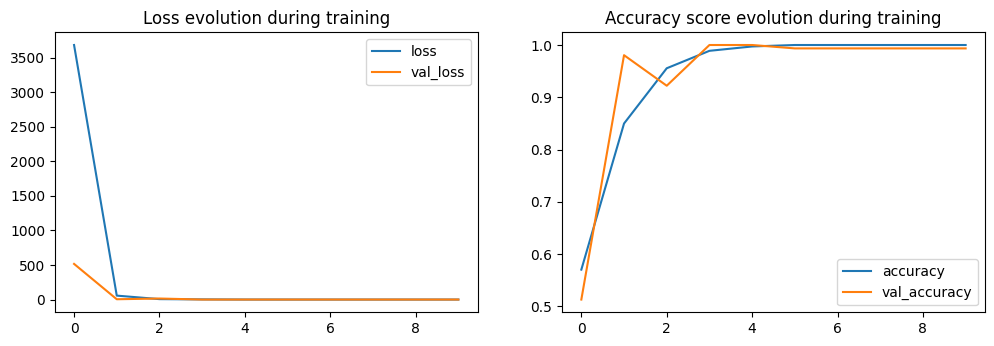

In [10]:
def plot_learning_curves(history):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Loss evolution during training')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy score evolution during training')
    plt.legend();

plot_learning_curves(history)

In [11]:
model.evaluate(ds_test)

5/5 [==============================] - 1s 32ms/step - loss: 0.7933 - accuracy: 0.9740


[0.7932910919189453, 0.9740259647369385]

In [21]:
# Make predictions on the test set
test_images, test_labels = [], []
for images, labels in ds_test:
    test_images.append(images.numpy())
    test_labels.append(labels.numpy())
test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Identify correct and incorrect predictions
correct_predictions = predicted_labels == test_labels
incorrect_predictions = predicted_labels != test_labels

# Get indices for correct and incorrect predictions
correct_indices = np.where(correct_predictions)[0]
incorrect_indices = np.where(incorrect_predictions)[0]

5/5 [==============================] - 0s 79ms/step


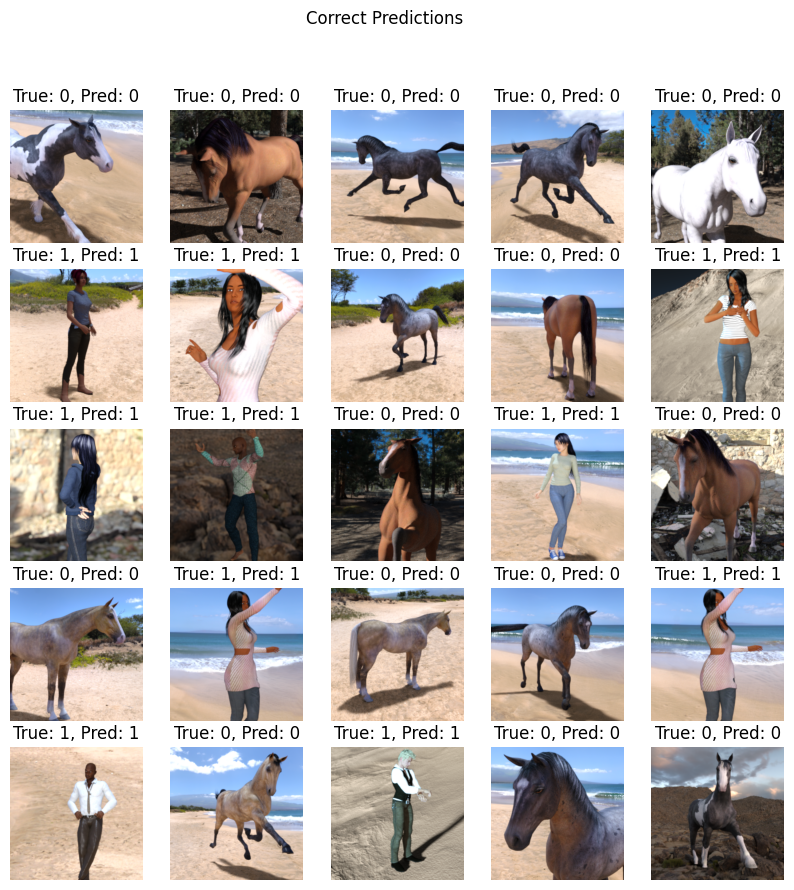

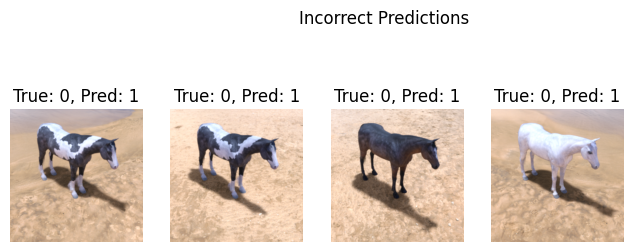

In [22]:
# Function to plot images with their predictions and true labels
def plot_predictions(images, true_labels, predicted_labels, indices, title):
    plt.figure(figsize=(10, 10))
    for i, index in enumerate(indices[:25]):  # Plot the first 25 images
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[index])
        plt.title(f"True: {true_labels[index]}, Pred: {predicted_labels[index]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot correct predictions
plot_predictions(test_images, test_labels, predicted_labels, correct_indices, title="Correct Predictions")

# Plot incorrect predictions
plot_predictions(test_images, test_labels, predicted_labels, incorrect_indices, title="Incorrect Predictions")